In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sns

In [3]:
# use pandas to import csv file
df = pd.read_csv("apartments_for_rent_classified_10K.csv", sep=";", encoding='cp1252') 
# too see max columns
pd.set_option('display.max_columns',None)
# print dataframe
df

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",10,5.0,0,USD,No,Thumbnail,0,790,$790,Monthly,101,5,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",5,5.0,1,USD,No,Thumbnail,0,425,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",5,1.0,0,USD,No,Thumbnail,0,1390,"$1,390",Monthly,107,5,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",7,1.0,0,USD,No,Thumbnail,0,925,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",9,5.0,0,USD,No,Thumbnail,0,880,$880,Monthly,125,5,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5630240092,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,5,4.0,5,USD,No,Thumbnail,0,6000,"$6,000",Monthly,6300,5407 Abbott Place Abbott,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",5,8.0,6,USD,No,Thumbnail,0,25000,"$25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419
9997,5668643292,housing/rent/apartment,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, ...",5,8.5,6,USD,No,Thumbnail,0,11000,"$11,000",Monthly,11318,9908 Bentcross Dr,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560
9998,5668662559,housing/rent/apartment,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...","Basketball,Cable or Satellite,Doorman,Hot Tub,...",5.0,1,USD,No,Thumbnail,5,4790,"$4,790",Monthly,40000,5,New York,NY,40.7716,-73.9876,Listanza,1577362186


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      10000 non-null  object 
 5   bathrooms      10000 non-null  float64
 6   bedrooms       10000 non-null  int64  
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   10000 non-null  object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        10000 non-null  object 
 16  cityname       10000 non-null  object 
 17  state          10000 non-null  object 
 18  latitud

In [5]:
#New dataframe 
new_df = df
#Checking for null values 
print(new_df.isnull().sum()) 
print("Missing values distribution: ")
print(new_df.isnull().mean())

id               0
category         0
title            0
body             0
amenities        0
bathrooms        0
bedrooms         0
currency         0
fee              0
has_photo        0
pets_allowed     0
price            0
price_display    0
price_type       0
square_feet      0
address          0
cityname         0
state            0
latitude         0
longitude        0
source           0
time             0
dtype: int64
Missing values distribution: 
id               0.0
category         0.0
title            0.0
body             0.0
amenities        0.0
bathrooms        0.0
bedrooms         0.0
currency         0.0
fee              0.0
has_photo        0.0
pets_allowed     0.0
price            0.0
price_display    0.0
price_type       0.0
square_feet      0.0
address          0.0
cityname         0.0
state            0.0
latitude         0.0
longitude        0.0
source           0.0
time             0.0
dtype: float64


In [6]:
# #Checking for duplicates
print(new_df.duplicated().any()) 

False


In [7]:
print(new_df.duplicated())
print(new_df.shape) 

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool
(10000, 22)


In [8]:
#Replacing string values with integer 
new_df["fee"].replace({"yes":"1", "no":"0"}, inplace = False) 
print(new_df.head())

           id                category   
0  5668626895  housing/rent/apartment  \
1  5664597177  housing/rent/apartment   
2  5668626833  housing/rent/apartment   
3  5659918074  housing/rent/apartment   
4  5668626759  housing/rent/apartment   

                                               title   
0  Studio apartment 2nd St NE, Uhland Terrace NE,...  \
1                  Studio apartment 814 Schutte Road   
2  Studio apartment N Scott St, 14th St N, Arling...   
3                     Studio apartment 1717 12th Ave   
4  Studio apartment Washington Blvd, N Cleveland ...   

                                                body amenities  bathrooms   
0  This unit is located at second St NE, Uhland T...        10        5.0  \
1  This unit is located at 814 Schutte Road, Evan...         5        5.0   
2  This unit is located at N Scott St, 14th St N,...         5        1.0   
3  This unit is located at 1717 12th Ave, Seattle...         7        1.0   
4  This unit is located at Wash

In [9]:
#Finding unique values in "Region" 
print(new_df["price_display"].unique()) 

['$790' '$425' '$1,390' ... '$19,500' '$25,000' '$4,790']


In [10]:
#Replacing string values with int
 
new_df['pets_allowed'].replace({'0':'No','1':'Yes'}, inplace = True)
print(new_df.head())

           id                category   
0  5668626895  housing/rent/apartment  \
1  5664597177  housing/rent/apartment   
2  5668626833  housing/rent/apartment   
3  5659918074  housing/rent/apartment   
4  5668626759  housing/rent/apartment   

                                               title   
0  Studio apartment 2nd St NE, Uhland Terrace NE,...  \
1                  Studio apartment 814 Schutte Road   
2  Studio apartment N Scott St, 14th St N, Arling...   
3                     Studio apartment 1717 12th Ave   
4  Studio apartment Washington Blvd, N Cleveland ...   

                                                body amenities  bathrooms   
0  This unit is located at second St NE, Uhland T...        10        5.0  \
1  This unit is located at 814 Schutte Road, Evan...         5        5.0   
2  This unit is located at N Scott St, 14th St N,...         5        1.0   
3  This unit is located at 1717 12th Ave, Seattle...         7        1.0   
4  This unit is located at Wash

In [11]:
#Describing data after preprocessing 
print(new_df.shape) 
print(new_df.head())

(10000, 22)
           id                category   
0  5668626895  housing/rent/apartment  \
1  5664597177  housing/rent/apartment   
2  5668626833  housing/rent/apartment   
3  5659918074  housing/rent/apartment   
4  5668626759  housing/rent/apartment   

                                               title   
0  Studio apartment 2nd St NE, Uhland Terrace NE,...  \
1                  Studio apartment 814 Schutte Road   
2  Studio apartment N Scott St, 14th St N, Arling...   
3                     Studio apartment 1717 12th Ave   
4  Studio apartment Washington Blvd, N Cleveland ...   

                                                body amenities  bathrooms   
0  This unit is located at second St NE, Uhland T...        10        5.0  \
1  This unit is located at 814 Schutte Road, Evan...         5        5.0   
2  This unit is located at N Scott St, 14th St N,...         5        1.0   
3  This unit is located at 1717 12th Ave, Seattle...         7        1.0   
4  This unit is loc

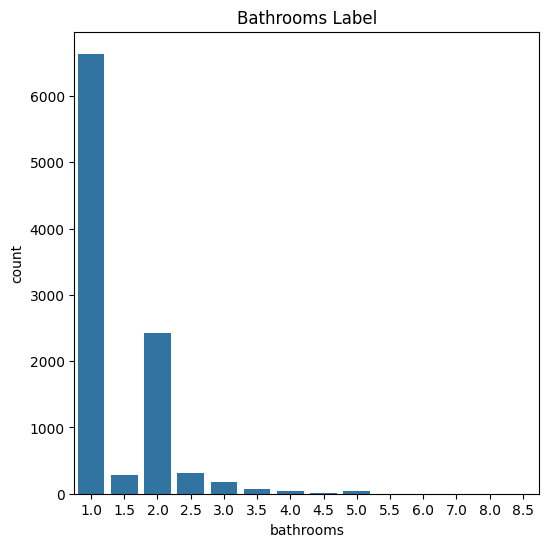

In [12]:
new_df.amenities.value_counts()
plt.figure(figsize=(6,6))
sns.countplot(x='bathrooms', data=new_df)
plt.title('Bathrooms Label')
plt.show()

In [13]:
from sklearn.datasets import make_classification
X, y = make_classification(n_classes=2, class_sep=0.5,
weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0,
n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=10)

In [14]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [15]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [16]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (700, 2)
Number transactions y_train dataset:  (700,)
Number transactions X_test dataset:  (300, 2)
Number transactions y_test dataset:  (300,)
